In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path as P
import matplotlib.pyplot as plt
import plotly.express as px

TIME='时间'
DATE='日期'
MONTH,YEAR='月份','年份'

In [90]:
ls 数据集\基本数据\*.xls*

 驱动器 D 中的卷是 Data
 卷的序列号是 BE8C-D0EF

 D:\我的数据\研二上学期\华为杯\huawei-cup\2022\E\数据集\基本数据 的目录

2022/10/06  10:40            32,768 附件10、叶面积指数（LAI）2012-2022年.xls
2022/10/07  09:36            36,864 附件11、一些历史数据.xls
2022/10/06  10:40            39,936 附件3、土壤湿度2022—2012年.xls
2022/10/06  10:40            35,840 附件4、土壤蒸发量2012—2022年.xls
2022/10/06  10:40            32,768 附件6、植被指数-NDVI2012-2022年.xls
2022/10/06  10:40            22,016 附件7、锡林郭勒土壤基本数据.xls
2022/10/06  10:40            15,798 附件9、径流量2012-2022年.xlsx
               7 个文件        215,990 字节
               0 个目录 245,363,081,216 可用字节


In [91]:
DATADIR=P('./数据集/基本数据/')

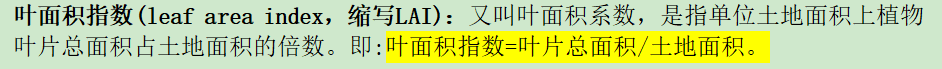

In [92]:
excel=pd.ExcelFile('./数据集/基本数据/附件10、叶面积指数（LAI）2012-2022年.xls')
excel.sheet_names

['sheet1']

In [93]:
df=excel.parse(0)
df

,日期,经度(lon),纬度(lat),"高层植被(LAIH,m2/m2)","低层植被(LAIL,m2/m2)"
0,202201,115.375,44.125,0.0,0.63638
1,202202,115.375,44.125,0.0,0.65073
2,202203,115.375,44.125,0.0,0.71679
3,202204,115.375,44.125,0.0,0.72653
4,202205,115.375,44.125,0.0,0.73950
...,...,...,...,...,...
122,201208,115.375,44.125,0.0,0.98300
123,201209,115.375,44.125,0.0,0.84700
124,201210,115.375,44.125,0.0,0.73800
125,201211,115.375,44.125,0.0,0.71000


In [94]:
df.columns

Index(['日期', '经度(lon)', '纬度(lat)', '高层植被(LAIH,m2/m2)', '低层植被(LAIL,m2/m2)'], dtype='object')

In [95]:
df=df.drop(columns=['经度(lon)', '纬度(lat)','高层植被(LAIH,m2/m2)',])
# 高层植被高度恒为零。
df.columns

Index(['日期', '低层植被(LAIL,m2/m2)'], dtype='object')

In [96]:
df[DATE] = pd.to_datetime(df[DATE].astype(str)+'01')

In [97]:
df=df.set_index(DATE)


In [98]:
df=df.sort_index()
df

,"低层植被(LAIL,m2/m2)"
日期,
2012-01-01,0.63600
2012-02-01,0.65200
2012-03-01,0.71700
2012-04-01,0.72700
2012-05-01,0.73900
...,...
2022-03-01,0.71679
2022-04-01,0.72653
2022-05-01,0.73950


In [99]:
px.line(df, y=df.columns[0]).update_layout(yaxis_title='低层植被叶面积指数LAIL(m2/m2)', title='附件10、叶面积指数（LAI）2012-2022年', legend_title='')


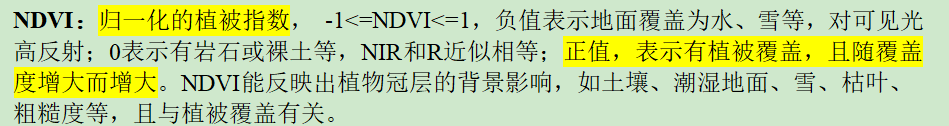

In [100]:
df.to_csv('附件10-低层植被叶面积指数LAIL-预处理.csv')

In [101]:
df=pd.read_excel('./数据集/基本数据/附件6、植被指数-NDVI2012-2022年.xls')
df

,月份,年份,经度(lon),纬度(lat),植被指数(NDVI)
0,1,2022,115.375,44.125,0.010
1,2,2022,115.375,44.125,0.010
2,3,2022,115.375,44.125,0.187
3,4,2022,115.375,44.125,0.191
4,1,2021,115.375,44.125,-0.002
...,...,...,...,...,...
119,8,2012,115.375,44.125,0.597
120,9,2012,115.375,44.125,0.475
121,10,2012,115.375,44.125,0.282
122,11,2012,115.375,44.125,0.176


In [102]:
df=df.drop(columns=['经度(lon)', '纬度(lat)'])
df.columns

Index(['月份', '年份', '植被指数(NDVI)'], dtype='object')

In [103]:
NDVI='植被指数(NDVI)'

In [104]:
BAD=(df[NDVI] < -1)|(df[NDVI] > 1)
# NDVI 没有脏数据
BAD.any()

False

In [105]:
df.info() # 整个df也没有空值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   月份          124 non-null    int64  
 1   年份          124 non-null    int64  
 2   植被指数(NDVI)  124 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 3.0 KB


In [106]:
x=df[YEAR].astype(str)+'-'+df[MONTH].astype(str)+'-1'
df[TIME] = pd.to_datetime(x)
df

,月份,年份,植被指数(NDVI),时间
0,1,2022,0.010,2022-01-01
1,2,2022,0.010,2022-02-01
2,3,2022,0.187,2022-03-01
3,4,2022,0.191,2022-04-01
4,1,2021,-0.002,2021-01-01
...,...,...,...,...
119,8,2012,0.597,2012-08-01
120,9,2012,0.475,2012-09-01
121,10,2012,0.282,2012-10-01
122,11,2012,0.176,2012-11-01


In [107]:
df=df.set_index(TIME)
df

,月份,年份,植被指数(NDVI)
时间,,,
2022-01-01,1,2022,0.010
2022-02-01,2,2022,0.010
2022-03-01,3,2022,0.187
2022-04-01,4,2022,0.191
2021-01-01,1,2021,-0.002
...,...,...,...
2012-08-01,8,2012,0.597
2012-09-01,9,2012,0.475
2012-10-01,10,2012,0.282


In [108]:
df.to_csv('附件6、植被指数-NDVI2012-2022年-预处理.csv')

In [109]:
px.line(df.loc['2013'], y=NDVI).update_layout(title='2013年 NDVI 指数')

In [114]:
f=list(P('.').rglob('附件9、径流量2012-2022年*xls*'))[0]
df=pd.read_excel(f)
df

,月份,年份,经度(lon),纬度(lat),径流量(m3/s),径流量(m3)
0,1,2022,115.375,44.125,0.160786,430650.00
1,2,2022,115.375,44.125,0.116071,280800.00
2,3,2022,115.375,44.125,0.825605,2211300.00
3,1,2021,115.375,44.125,0.066532,178200.00
4,2,2021,115.375,44.125,0.033482,81000.00
...,...,...,...,...,...,...
118,8,2012,115.375,44.125,0.621472,1664550.10
119,9,2012,115.375,44.125,0.444010,1150875.00
120,10,2012,115.375,44.125,0.361643,968624.94
121,11,2012,115.375,44.125,0.290104,751950.00


In [115]:
df=df.drop(columns=['经度(lon)', '纬度(lat)'])
x=df[YEAR].astype(str)+'-'+df[MONTH].astype(str)+'-1'
df[TIME] = pd.to_datetime(x)
df=df.set_index(TIME).sort_index()
df

,月份,年份,径流量(m3/s),径流量(m3)
时间,,,,
2012-01-01,1,2012,0.000000,0.00
2012-02-01,2,2012,0.000000,0.00
2012-03-01,3,2012,1.010081,2705400.00
2012-04-01,4,2012,0.569792,1476900.00
2012-05-01,5,2012,0.168347,450900.00
...,...,...,...,...
2021-11-01,11,2021,0.295573,766124.94
2021-12-01,12,2021,0.217238,581850.00
2022-01-01,1,2022,0.160786,430650.00


In [116]:
df.columns

Index(['月份', '年份', '径流量(m3/s)', '径流量(m3)'], dtype='object')

In [117]:
YCOLS=['径流量(m3/s)', '径流量(m3)']

In [118]:
px.line(df, y='径流量(m3/s)')

In [119]:
px.line(df, y='径流量(m3)')

In [120]:
# 两个径流量基本上趋势是一致的。
df.to_csv('附件9、径流量2012-2022年-预处理.csv')

### 绿植覆盖率

In [125]:
f_list=list(P('.').rglob('*覆盖率*xls'))
f_list

[WindowsPath('数据集/基本数据/附件5、绿植覆盖率（2020-2022）/2020绿植覆盖率.xls'),
 WindowsPath('数据集/基本数据/附件5、绿植覆盖率（2020-2022）/2021绿植覆盖率.xls'),
 WindowsPath('数据集/基本数据/附件5、绿植覆盖率（2020-2022）/2022绿植覆盖率.xls')]

In [122]:
df_list=[pd.read_excel(f) for f in f_list]
df=pd.concat(df_list)
df

,经度(lon),纬度(lat),绿植覆盖率,时间,备注
0,115.375,44.125,0.192,2020-07-10,NaN
1,115.375,44.125,0.292,2020-07-20,NaN
2,115.375,44.125,0.320,2020-07-31,NaN
3,115.375,44.125,0.384,2020-08-10,NaN
4,115.375,44.125,0.408,2020-08-20,NaN
...,...,...,...,...,...
7,115.375,44.125,0.016,2022-03-20,NaN
8,115.375,44.125,0.016,2022-03-31,NaN
9,115.375,44.125,0.024,2022-04-10,NaN
10,115.375,44.125,0.036,2022-04-20,NaN


In [123]:
df=df.drop(columns=['经度(lon)', '纬度(lat)','备注',])
df[TIME]=pd.to_datetime(df[TIME])
df=df.set_index(TIME).sort_index()
df

,绿植覆盖率
时间,
2020-07-10,0.192
2020-07-20,0.292
2020-07-31,0.320
2020-08-10,0.384
2020-08-20,0.408
...,...
2022-03-20,0.016
2022-03-31,0.016
2022-04-10,0.024


In [124]:
px.line(df, y=df.columns[0]).update_layout(yaxis_title='绿植覆盖率', title='附件5、绿植覆盖率（2020-2022）')

### 附件7、锡林郭勒土壤基本数据

In [127]:
f=list(P('.').rglob('附件7、锡林郭勒土壤基本数据*'))[0]
f

WindowsPath('数据集/基本数据/附件7、锡林郭勒土壤基本数据.xls')

In [135]:
df=pd.read_excel(f, sheet_name='data', header=None)
df=df.rename(columns=dict(enumerate(['属性','取值'])))
df

,属性,取值
0,经度(lon),115.375
1,纬度(lat),44.125
2,类型,栗钙土
3,表土质地,中
4,排水等级(0-0.5%坡度),4-适中
5,土壤参考深度(cm),100.0
6,土壤有效水含量(mm),1.0
7,浅层砾石含量%,8.0
8,浅层沙含量%,37.0
9,浅层淤泥含量%,42.0


In [136]:
df.to_csv('附件7、锡林郭勒土壤基本数据-预处理.csv')

### 一些历史数据

In [137]:
#附件11、一些历史数据
f=list(P('.').rglob('附件11、一些历史数据*'))[0]
f

WindowsPath('数据集/基本数据/附件11、一些历史数据.xls')

In [138]:
excel=pd.ExcelFile(f)
excel.sheet_names

['土壤养分', '观测12土壤容重', '观测1土壤养分', '观测2土壤养分']

In [139]:
df_map=excel.parse(sheet_name=[ '观测12土壤容重', '观测1土壤养分', '观测2土壤养分'])

In [147]:
df_list=list(df_map.values())


In [148]:
df_list=[df.drop(index=0) for df in df_list]

In [158]:
df, df1, df2=df_list
df1['场地名称']='观测场1'
df2['场地名称']='观测场2'
df1, df2, df

(         年   采样深度  土壤有机质    全氮    全磷    pH  场地名称
 1   2005.0   0–10  35.45  1.95  0.29  7.21  观测场1
 2   2005.0  10–20   21.4  1.21  0.22   7.2  观测场1
 3   2005.0  20–40  15.96  0.89  0.19  7.33  观测场1
 4   2005.0  40–60  13.12  0.74  0.18  7.89  观测场1
 5   2006.0   0–10  11.21  1.95  0.34  7.16  观测场1
 6   2006.0  10–20  35.65  1.52  0.29  7.15  观测场1
 7   2006.0  20–40  27.16  1.02  0.23  7.22  观测场1
 8   2006.0  40–60  18.55  0.85  0.21  7.82  观测场1
 9   2007.0   0–10   16.2  1.96  0.31  7.17  观测场1
 10  2007.0  10–20  38.01  1.05  0.22  7.08  观测场1
 11  2007.0  20–40  19.65  0.81  0.19     –  观测场1
 12  2007.0  40–60  15.36  0.72  0.19     –  观测场1
 13  2008.0   0–10  14.22  2.13  0.38  7.18  观测场1
 14  2008.0  10–20  37.37  1.56  0.32  7.13  观测场1
 15  2008.0  20–40   28.5  1.01  0.26  7.15  观测场1
 16  2008.0  40–60   19.8  0.84  0.24  7.23  观测场1,
          年   采样深度  土壤有机质    全氮    全磷    pH  场地名称
 1   2005.0   0–10  30.31  1.78   0.3  8.67  观测场2
 2   2005.0  10–20  25.74   1.6  0.28  8.78  观测场2